In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

csv = 'clean_tweet.csv'
df = pd.read_csv(csv,index_col=0)

df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)


/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
x = df.text
y = df.target

from sklearn.cross_validation import train_test_split
SEED = 1500
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.metrics import accuracy_score
import random

baseline_pred = [1 for i in x_validation]

print("Accuracy score: ")
print(accuracy_score(y_validation, baseline_pred)*100)

Accuracy score: 
50.25367992483558


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("-"*80)
    return accuracy

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy))
    return result


In [5]:
print("unigram without stop words\n")
unwisw = nfeature_accuracy_checker(stop_words='english')

unigram without stop words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.25%
accuracy score: 77.22%
model is 26.97% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.25%
accuracy score: 77.66%
model is 27.41% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.25%
accuracy score: 77.75%
model is 27.50% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.25%
accuracy s

In [7]:
print("unigram with stop words\n")
unwsw = nfeature_accuracy_checker()

unigram with stop words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.25%
accuracy score: 79.45%
model is 29.20% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.25%
accuracy score: 79.77%
model is 29.52% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.25%
accuracy score: 79.86%
model is 29.60% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.25%
accuracy scor

In [8]:
stop_words = ['to','the','my','it','and','you','not','is','in','for']
print("unigram without custom stop words")
unwcsw = nfeature_accuracy_checker(stop_words=stop_words)

unigram without custom stop words
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.25%
accuracy score: 78.58%
model is 28.32% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.25%
accuracy score: 78.97%
model is 28.72% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.25%
accuracy score: 79.14%
model is 28.88% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.25%
accu

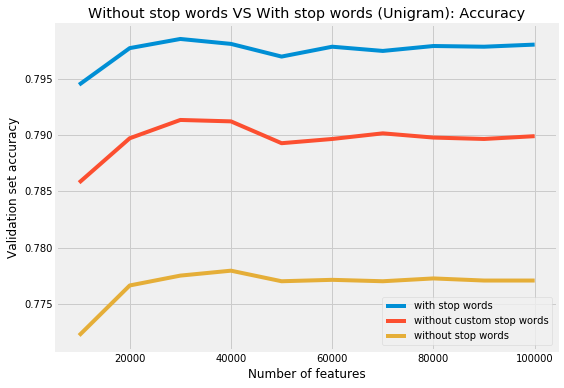

In [10]:
nfeatures_plot_ug = pd.DataFrame(unwsw,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug_wocsw = pd.DataFrame(unwcsw,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug_wosw = pd.DataFrame(unwisw,columns=['nfeatures','validation_accuracy'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [11]:
print("bigram with stop words\n")
bwsw = nfeature_accuracy_checker(ngram_range=(1, 2))

bigram with stop words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.25%
accuracy score: 80.29%
model is 30.03% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.25%
accuracy score: 80.96%
model is 30.71% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.25%
accuracy score: 81.13%
model is 30.87% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.25%
accuracy score

In [5]:
print("trigram with stop words\n")
twsw = nfeature_accuracy_checker(ngram_range=(1, 3))

trigram with stop words

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 50.25%
accuracy score: 80.14%
model is 29.89% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 50.25%
accuracy score: 81.05%
model is 30.80% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 50.25%
accuracy score: 81.28%
model is 31.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 50.25%
accuracy scor

In [ ]:
nfeatures_plot_tg = pd.DataFrame(twsw,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bg = pd.DataFrame(bwsw,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug = pd.DataFrame(unwsw,columns=['nfeatures','validation_accuracy'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion)
    print("-"*80)
    print("Classification Report\n")
    print(classification_report(y_test, y_pred, target_names=['negative','positive']))


In [8]:
ug_cvec = CountVectorizer(max_features=80000)
ug_pipeline = Pipeline([
        ('vectorizer', ug_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(ug_pipeline, x_train, y_train, x_validation, y_validation)


null accuracy: 50.25%
accuracy score: 79.79%
model is 29.54% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6246                1696
positive                1530                6493
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.80      0.79      0.79      7942
   positive       0.79      0.81      0.80      8023

avg / total       0.80      0.80      0.80     15965



In [9]:
bg_cvec = CountVectorizer(max_features=70000,ngram_range=(1, 2))
bg_pipeline = Pipeline([
        ('vectorizer', bg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(bg_pipeline, x_train, y_train, x_validation, y_validation)


null accuracy: 50.25%
accuracy score: 81.55%
model is 31.30% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6369                1573
positive                1372                6651
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.82      0.80      0.81      7942
   positive       0.81      0.83      0.82      8023

avg / total       0.82      0.82      0.82     15965



In [10]:
tg_cvec = CountVectorizer(max_features=80000,ngram_range=(1, 3))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)


null accuracy: 50.25%
accuracy score: 81.61%
model is 31.36% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6342                1600
positive                1336                6687
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.83      0.80      0.81      7942
   positive       0.81      0.83      0.82      8023

avg / total       0.82      0.82      0.82     15965

